In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("./data/simulation.csv", index_col=0)

In [15]:
df.head()

,x-position,y-position,time,circular
Particles,,,,
Particles0,-1.794447,-1.487731,0,NaN
Particles1,4.147627,-0.360544,0,NaN
Particles2,-9.392871,-3.431323,0,NaN
Particles3,6.151499,-2.049880,0,NaN
Particles4,-0.026178,4.993316,0,NaN


In [16]:
df_boundary = df.iloc[:,-1:]
name = list(df_boundary.keys())

In [17]:
df = df[['x-position','y-position','time']]
df.head()

,x-position,y-position,time
Particles,,,
Particles0,-1.794447,-1.487731,0
Particles1,4.147627,-0.360544,0
Particles2,-9.392871,-3.431323,0
Particles3,6.151499,-2.049880,0
Particles4,-0.026178,4.993316,0


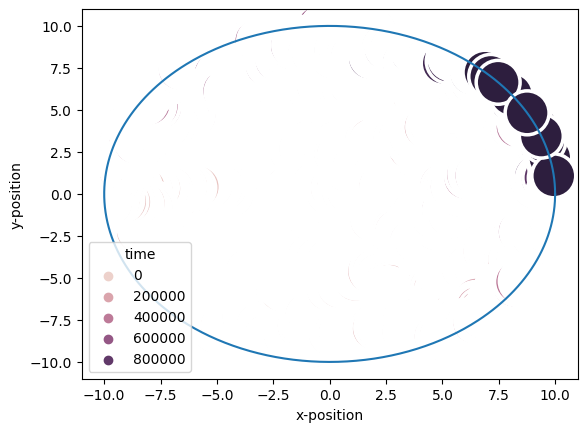

In [18]:
sns.scatterplot(data = df ,x = 'x-position', y = 'y-position', hue = "time", s = 1000.0)
if name[0] == 'squared':
    # squared
    plt.vlines(x = 10, ymin = -10.0, ymax = 10.0)
    plt.vlines(x = -10, ymin = -10.0, ymax = 10.0)
    plt.hlines(y = 10, xmin = -10.0, xmax = 10.0)
    plt.hlines(y = -10, xmin = -10.0, xmax = 10.0)
if name[0] == 'circular':
    # circular
    theta = np.arange(0.0,2.0*np.pi,0.01)
    R = 10.0
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    plt.plot(x,y)

In [19]:
df_index = df.sort_index()
df_index

,x-position,y-position,time
Particles,,,
Particles0,-1.794447,-1.487731,0
Particles0,8.735265,4.798088,834500
Particles0,3.040950,-2.053130,220700
Particles0,8.808887,4.727467,834400
Particles0,2.947463,-2.093768,220800
...,...,...,...
Particles9,9.511024,3.088759,515100
Particles9,8.889520,4.580003,933000
Particles9,-0.076013,2.257098,89200


In [20]:
df_particles0 = df_index.loc['Particles0']
df_particles1 = df_index.loc['Particles1']
df_particles2 = df_index.loc['Particles2']
df_particles3 = df_index.loc['Particles3']
df_particles4 = df_index.loc['Particles4']

In [21]:
df_particles0 = df_particles0.sort_values('time')
df_particles1 = df_particles1.sort_values('time')
df_particles2 = df_particles2.sort_values('time')
df_particles3 = df_particles3.sort_values('time')
df_particles4 = df_particles4.sort_values('time')

In [22]:
df_particles4

,x-position,y-position,time
Particles,,,
Particles4,-0.026178,4.993316,0
Particles4,-0.011633,4.972428,100
Particles4,-0.007557,5.003038,200
Particles4,0.011717,5.035338,300
Particles4,0.001027,5.060668,400
...,...,...,...
Particles4,9.450468,3.269351,999500
Particles4,9.459074,3.244367,999600
Particles4,9.401078,3.400358,999700


In [23]:
# Video
x_particles0 = df_particles0['x-position']
y_particles0 = df_particles0['y-position']
x_particles0_array = x_particles0.to_numpy()
y_particles0_array = y_particles0.to_numpy()

x_particles1 = df_particles1['x-position']
y_particles1 = df_particles1['y-position']
x_particles1_array = x_particles1.to_numpy()
y_particles1_array = y_particles1.to_numpy()

x_particles2 = df_particles2['x-position']
y_particles2 = df_particles2['y-position']
x_particles2_array = x_particles2.to_numpy()
y_particles2_array = y_particles2.to_numpy()

x_particles3 = df_particles3['x-position']
y_particles3 = df_particles3['y-position']
x_particles3_array = x_particles3.to_numpy()
y_particles3_array = y_particles3.to_numpy()

x_particles4 = df_particles4['x-position']
y_particles4 = df_particles4['y-position']
x_particles4_array = x_particles4.to_numpy()
y_particles4_array = y_particles4.to_numpy()


#for i in range(len(x_particles0_array)-100):
i = 0
while i < len(x_particles0_array):
    #if name[0] == 'squared':
    #    # squared
    #plt.vlines(x = 10, ymin = -10.0, ymax = 10.0)
    #plt.vlines(x = -10, ymin = -10.0, ymax = 10.0)
    #plt.hlines(y = 10, xmin = -10.0, xmax = 10.0)
    #plt.hlines(y = -10, xmin = -10.0, xmax = 10.0)
    #if name[0] == 'circular':
    # circular
    theta = np.arange(0.0,2.0*np.pi,0.01)
    R = 10.0
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    plt.plot(x,y)
    
    plt.scatter(x_particles0_array[i],y_particles0_array[i],s=500)
    plt.scatter(x_particles1_array[i],y_particles1_array[i],s=500)
    plt.scatter(x_particles2_array[i],y_particles2_array[i],s=500)
    plt.scatter(x_particles3_array[i],y_particles3_array[i],s=500)
    plt.scatter(x_particles4_array[i],y_particles4_array[i],s=500)
    
    plt.savefig('./data/movie/p'+str(i).zfill(5)+'.png')
    plt.clf()
    i += 10

<Figure size 640x480 with 0 Axes>

In [24]:
# ffmpeg -r 24 -f image2 -pattern_type glob -i "*.png" -vcodec libx264 -crf 20 -pix_fmt yuv420p output.mp4